In [191]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [192]:
# Loading the data.

df_space = pd.read_csv('space.csv')
df_space

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. The dataset is numerical in nature except for one column 'class' which is categorical in nature.

In [193]:
df_space.shape

(10000, 18)

In [194]:
# Let's check the data types of each feature.

df_space.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

So, the dataset contains 3 types of data 'object' having 1 columns, 'int64' type having 7 columns and rest are of 'float64' type.

So, below are the details of each feature of the dataset.

In [195]:
# Let's use the describe function to check the statistical summary of the dataset.

df_space.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


OBSERVATIONS :
    
    1. Rerun and objid have a same value for all the parameters of statistics as above except for the standard deviation.
    2. The range of  plate, mjd, fiberid and run is widely spread. Rest variables are having a normal range.
    3. The mean of dec, z, run, field, plate, mjd and fiberid is more than there median respectively. Rest for all the variables median is higher than the mean.
    4. The above summary reflects that the outliers as well as skewness is present in the dataset.

In [196]:
# Let's check the null values.

df_space.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

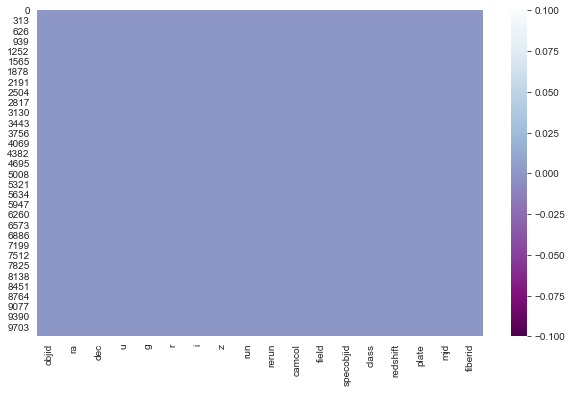

In [197]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df_space.isnull(), cmap = 'BuPu_r')
plt.show()

There are no null values present in the dataset.

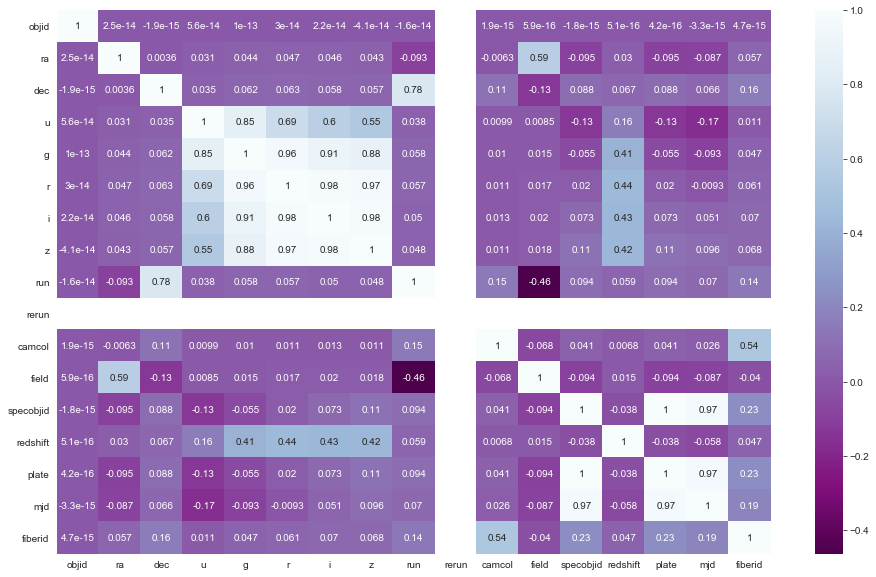

In [198]:
# Let's check the correlation of the dataset using heatmap.

plt.figure(figsize=(16,10))
sns.heatmap(df_space.corr(), cmap= "BuPu_r", annot= True)

OBSERVATIONS :
    
    1. rerun has no correlation with any variable in the dataset, thus this can be dropped from the dataset.
    2. plate and mjd have a strongly positively co related with each other.
    3. mjd is also strongly correlated with spaceobjid.
    4. The strong positive correlation can also been seen among g, r, i and z.
    5. There is strong negative correlation as well in the dataset between field and run.
    Overall th edatset is positively correlated.

In [199]:
# Let's check the numerical data from the dataset.

space_num = df_space.select_dtypes(exclude='object')
space_num.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64 
 



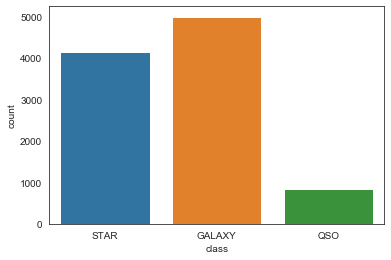

In [200]:
# UNIVARIATE ANALYSIS

# Let's check the value counts of target variable.

print(df_space['class'].value_counts(), '\n \n')
sns.countplot(df_space['class'],data=df_space)
plt.show()

The above countplot of target variable shows that as per the features, the count of GALAXY is high, identified as class followed by STAR.

In [201]:
space_num.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

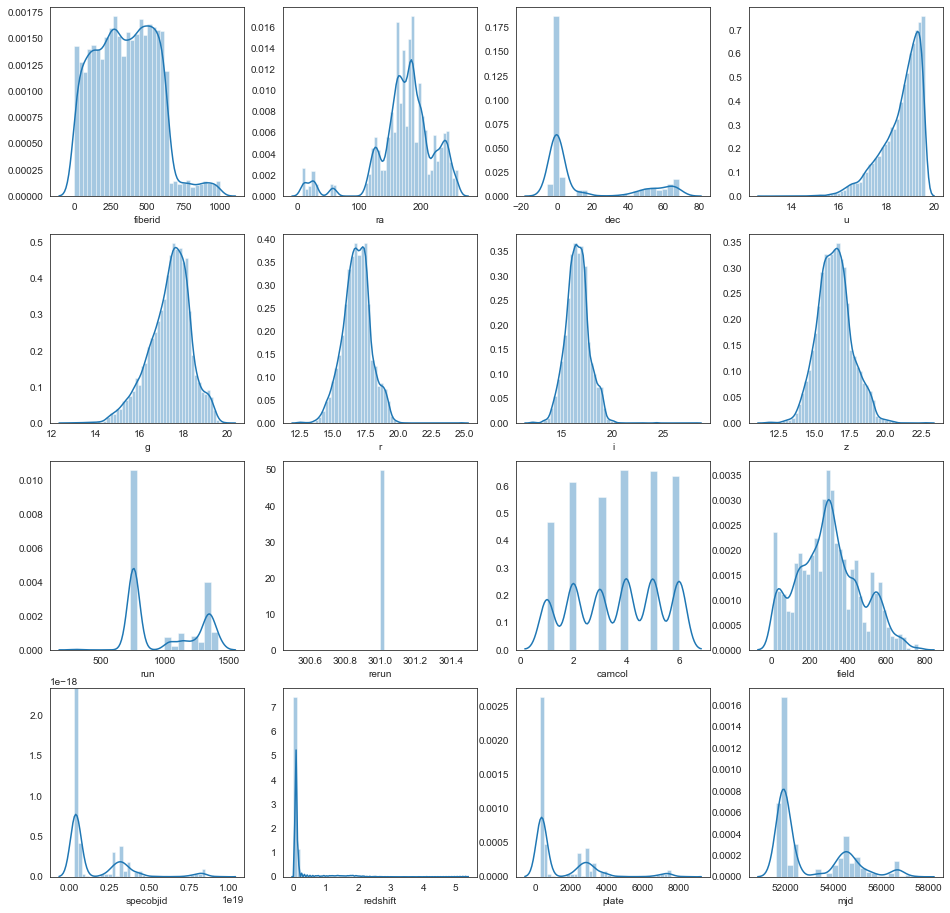

In [202]:
# Distribution of Different Features of the Dataset

fig,ax = plt.subplots(4,4, figsize=(16,16))               
sns.distplot(df_space['fiberid'], ax = ax[0,0]) 
sns.distplot(df_space['ra'], ax = ax[0,1]) 
sns.distplot(df_space['dec'], ax = ax[0,2]) 
sns.distplot(df_space['u'], ax = ax[0,3])
sns.distplot(df_space['g'], ax = ax[1,0]) 
sns.distplot(df_space['r'], ax = ax[1,1])
sns.distplot(df_space['i'], ax = ax[1,2]) 
sns.distplot(df_space['z'], ax = ax[1,3])
sns.distplot(df_space['run'], ax = ax[2,0]) 
sns.distplot(df_space['rerun'], ax = ax[2,1]) 
sns.distplot(df_space['camcol'], ax = ax[2,2]) 
sns.distplot(df_space['field'], ax = ax[2,3])
sns.distplot(df_space['specobjid'], ax = ax[3,0]) 
sns.distplot(df_space['redshift'], ax = ax[3,1])
sns.distplot(df_space['plate'], ax = ax[3,2]) 
sns.distplot(df_space['mjd'], ax = ax[3,3])
plt.show()

From above we conclude :
    1. Most of the variables are normally distributed.
    2. 'u' is negatively skewed.
    3. 'dec' and 'redshift' are rightly skewed.
    4. There is no distribution of 'rerun' as ther is only 1 value present in all the rows in the dataset.
    5. There are some variables too which are neither purely positively skewed nor normally distributed.
    
    Thus, later in the dataset, skewness is need to be treated.

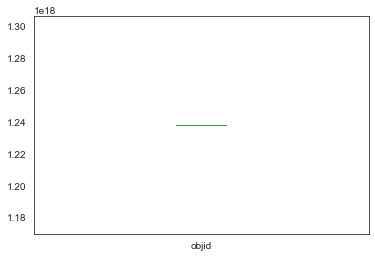

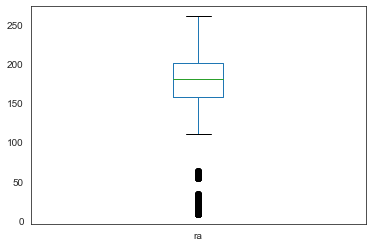

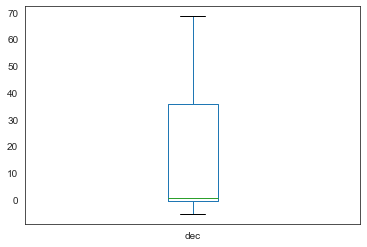

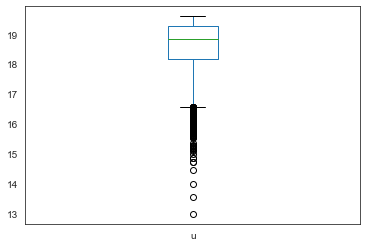

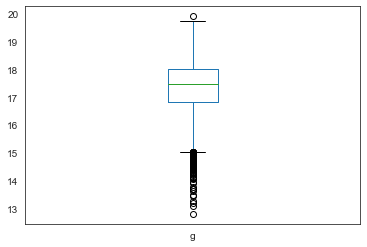

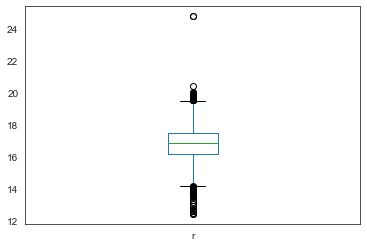

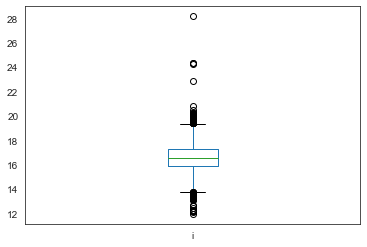

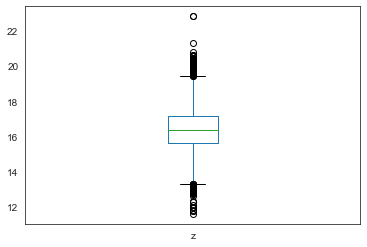

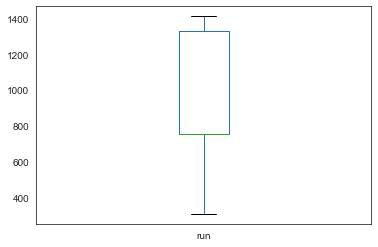

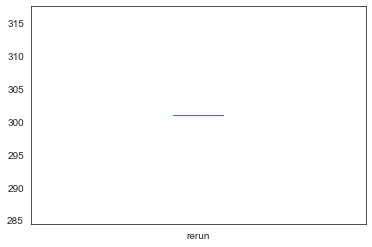

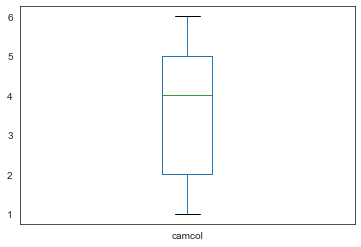

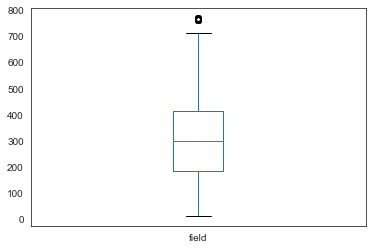

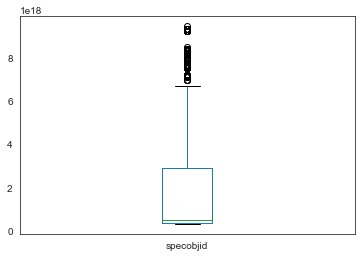

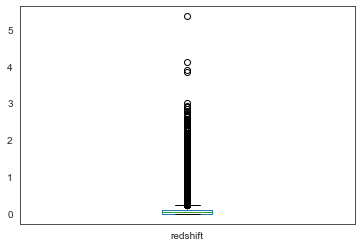

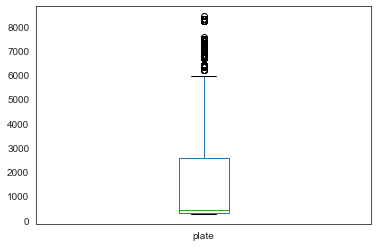

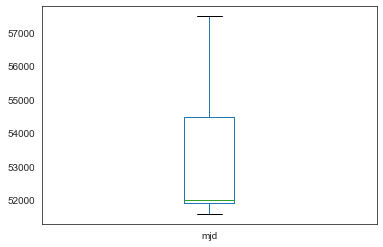

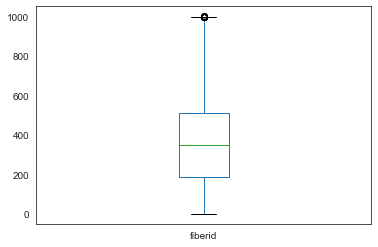

In [138]:
# Plotting the outliers using box plot.

for i in space_num.columns:
    sns.set_style('white')
    x = space_num[i].plot.box()
    plt.show()

1. The boxplots represents that there are outliers present in the dataset which need to be removed.
2. There are no outliers present in 'dec', 'run', 'camcol' and 'mjd'.
3. The 'objid' and 'rerun' are constant in just no statistical info. can be interpreted.


In [203]:
# BIVARIATE ANALYSIS

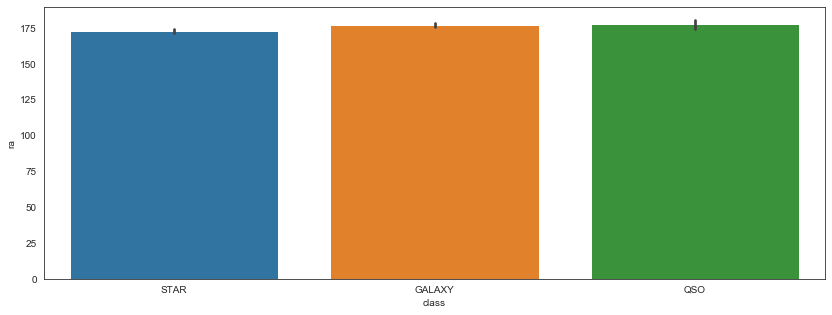

In [204]:
# The below bar plot shows the ra according to the class.

plt.figure(figsize= (14,5))
sns.barplot(x = df_space['class'], y = df_space['ra'], data = df_space)

The ra is equal in class GALAXY and QSO.

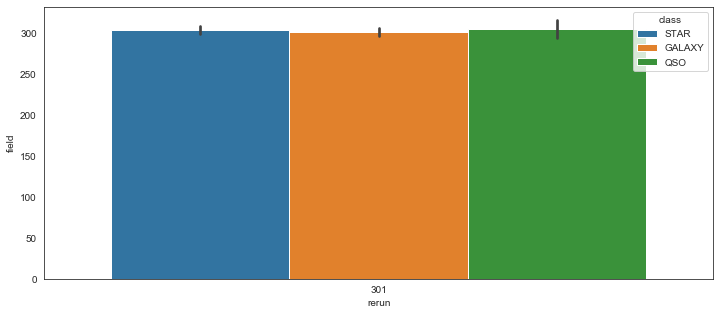

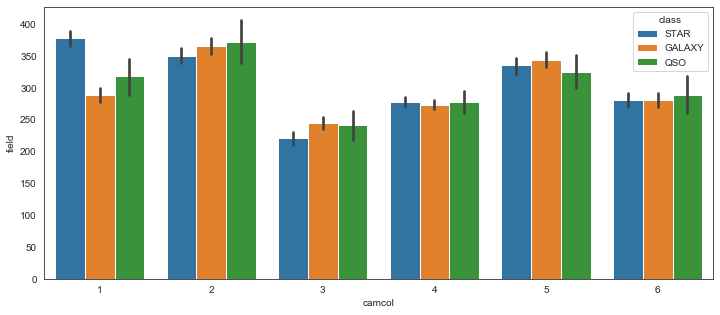

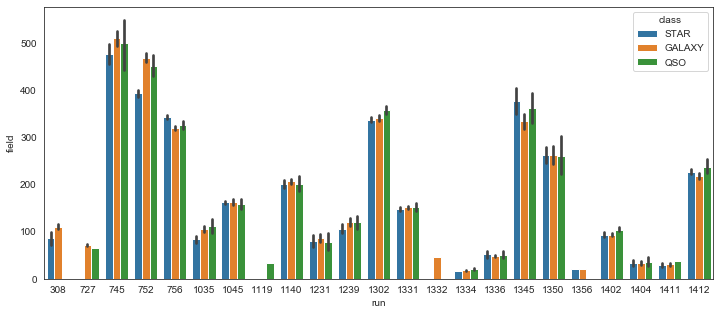

In [141]:
# The below bar plots shows the relationship of rerun, camcol and run against field according to the class.

plt.figure(figsize=(12,5))
sns.barplot(y="field", x="rerun", hue="class",data=df_space)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(y="field", x="camcol", hue="class",data=df_space)
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(y="field", x="run", hue="class",data=df_space)
plt.show()

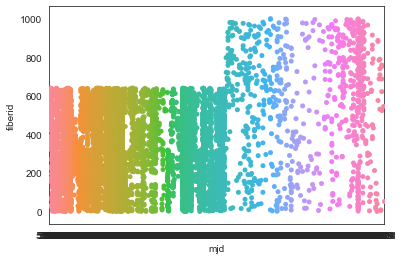

In [142]:
# Visualizing the relationship between the fiberid and mjd.

sns.stripplot(x="mjd",y="fiberid",data=df_space)
plt.show()

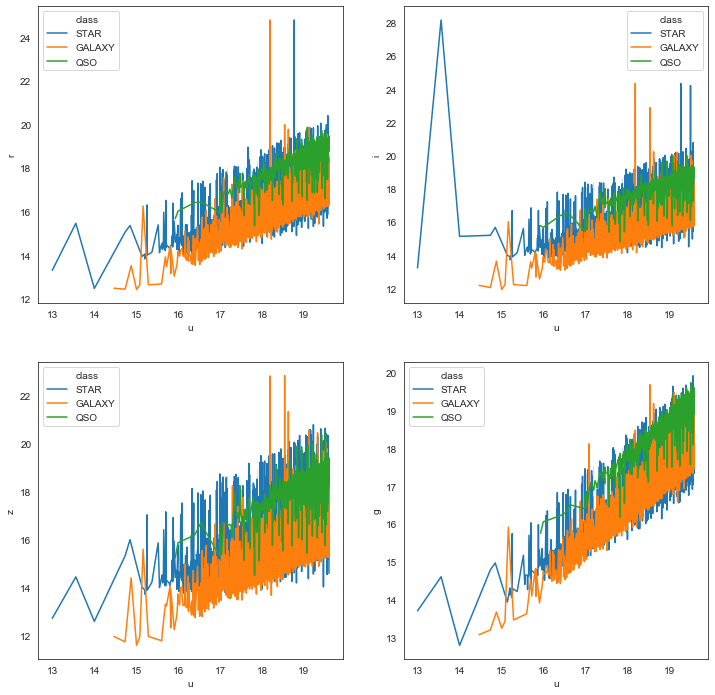

In [206]:
# Visualizing the relationship of numerical data with each otherr being target variable as hue using line plot.

fig,ax = plt.subplots(2,2, figsize=(12,12))               
sns.lineplot(x="u", y="r", hue="class",data=df_space,ax = ax[0,0]) 
sns.lineplot(x="u", y="i", hue="class",data=df_space, ax = ax[0,1]) 
sns.lineplot(x="u", y="z",hue="class",data=df_space, ax = ax[1,0]) 
sns.lineplot(x="u", y="g",hue="class",data=df_space, ax = ax[1,1]) 
plt.show()

There is a positive relationship between 'u'and other varibles against it respectively as per the class.

In [207]:
df_space['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [208]:
# Replacing the target variable as :
# GALAXY = 0, STAR = 1 and QSO = 2
# Checking the head after replacing.

df_space['class'] = df_space['class'].replace({"GALAXY":0, "STAR":1, "QSO":2})
df_space['class'].head()

0    1
1    1
2    0
3    1
4    1
Name: class, dtype: int64

In [209]:
# Dropping the objid and rerun as both of them are having 1 value in whole dataset.

df_space = df_space.drop(['objid','rerun'], axis=1)

In [210]:
# Converting the data type of specobjid as integer.

df_space['specobjid'] = df_space.specobjid.astype('int64')
df_space['specobjid'].dtypes

dtype('int64')

In [211]:
# Let's check the final data after assigning the numerical values in the target variable, dropping the columns and converting the datat-type of a column.

df_space.head()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3722360000000000000,1,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,363814000000000000,1,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,323274000000000000,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3722370000000000000,1,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3722370000000000000,1,0.000590,3306,54922,512


So, now the whole data is in numeric form.

In [214]:
# Let's check the skewness of the data.

df_space.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.327151
class        0.641904
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

By comparing shape of 'z' and 'df_space' shape , 1302 rows have been removed as an outlier.

In [216]:
# Treating the skewness with sqrt function.

for col in df_space.columns:
    if df_space.skew().loc[col]>0.55:
        df_space[col]=np.sqrt(df_space[col])

In [217]:
# Again checking the skewness after treament.

df_space.skew()

ra          -0.130951
dec          0.312530
u           -0.981103
g           -0.528033
r           -0.153454
i            0.055966
z            0.167256
run          0.518602
camcol      -0.141193
field        0.220032
specobjid    0.953631
class        0.289927
redshift     1.747730
plate        0.953614
mjd          0.956708
fiberid      0.065374
dtype: float64

The skewness in the data have been reduced to it's possible extent.

In [225]:
# Let's again check the null values.

df_space.isnull().sum()

ra              0
dec          3512
u               0
g               0
r               0
i               0
z               0
run             0
camcol          0
field           0
specobjid       0
class           0
redshift     1588
plate           0
mjd             0
fiberid         0
dtype: int64

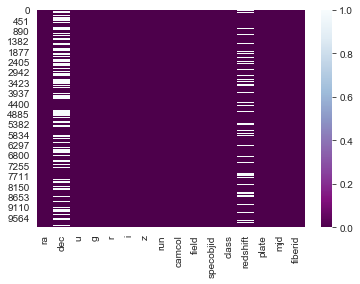

In [226]:
sns.heatmap(df_space.isnull(), cmap = 'BuPu_r')
plt.show()

Now, there are null values fresent in the final dataset which needs to be filled.

In [227]:
# FIlling the Missing Values.

# Now let's fill the null values with the mean of the respective columns.

df_space['dec'].replace(np.NaN,df_space['dec'].mean(),inplace=True)
df_space['redshift'].replace(np.NaN,df_space['redshift'].mean(),inplace=True)

In [228]:
# Again checking the null values after filling the same.

print(df_space.isnull().sum())

ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64


Now, no null values are present.

In [229]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_space))
print(z.shape)

# Removing the outliers.

df_space = df_space.loc[(z<3).all(axis=1)]
print(df_space.shape)

(8698, 16)
(8244, 16)


Comparing the 'z' and 'df_space', it shows that 454 rows have been removed as outliers.

In [230]:
# Let's Separating the input and target variables with the target variable Deaths.

X = df_space.drop(columns=["class"])
y = df_space[["class"]]

In [231]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(8244, 15)
(8244, 1)


In [232]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-5.38438944e-03, -1.27413929e+00,  1.09174657e+00, ...,
         1.67649241e+00,  1.70378723e+00,  7.91142336e-01],
       [-3.41093073e-03, -1.24796750e+00,  3.20198551e-02, ...,
        -7.03581424e-01, -8.92539770e-01,  1.05755222e+00],
       [-1.00206764e-03, -1.25278857e+00,  9.72771259e-01, ...,
        -7.65671700e-01, -5.67808139e-01,  9.08362683e-01],
       ...,
       [-1.54263055e+00,  1.36467133e+00, -4.77753029e-01, ...,
        -5.12686339e-01, -6.83864324e-01, -6.10173633e-01],
       [-1.53759516e+00,  1.36684807e+00,  3.19491267e-01, ...,
        -5.12686339e-01, -6.83864324e-01, -6.04845435e-01],
       [-1.53206548e+00,  1.36823853e+00,  8.32843338e-01, ...,
        -5.12686339e-01, -6.83864324e-01, -5.83532645e-01]])

In [233]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [234]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [235]:
# Finding the best alpha value for Ridge regression using GridsearchCV.

rg = Ridge()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(rg, parameters)
gd.fit(X,y)
gd.best_params_

{'alpha': 1}

In [236]:
# Finding the best alpha value for Ridge regression using GridsearchCV.

lreg = Lasso()
parameters = {"alpha":[0,0.0001,0.001,0.01,0.1,1]}
gd = GridSearchCV(lreg, parameters)
gd.fit(X,y)
gd.best_params_

{'alpha': 0.0001}

In [238]:
# Creating the instances for the algorithms.

lr = LinearRegression()
lreg = Lasso(alpha=0.0001)
rg = Ridge(alpha=1)
sv = SVR()
dtr = DecisionTreeRegressor()
knnr = KNeighborsRegressor()
rfr = RandomForestRegressor()

In [239]:
models = []
models.append(('LinearRegression', lr))
models.append(('Lasso', lreg))
models.append(('Ridge', rg))
models.append(('SVR', sv))
models.append(('DecisionTreeRegressor', dtr))
models.append(('KNeighborsRegressor', knnr))
models.append(('RandomForestRegressor', rfr))

In [240]:
# CReating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = max_r2_score(k, X, y)
    print('\n')
    mR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2)
    stdR2 = cross_val_score(k,  X, y, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.6789754818795523 achieved at 95


Mean Absolute Error :  0.4569036778348068


RMSE :  0.31586358427594724


Cross validation score (Mean r2 score): 0.6261023891348004
Standard Deviationin r2 score : 0.03193910205086031




-------- Lasso --------
Maximum r2 score : 0.6779876927984115 achieved at 95


Mean Absolute Error :  0.4572342423214931


RMSE :  0.31549776829200793


Cross validation score (Mean r2 score): 0.6262119083935668
Standard Deviationin r2 score : 0.031786290823337275




-------- Ridge --------
Maximum r2 score : 0.6778553983262587 achieved at 95


Mean Absolute Error :  0.4573095823115992


RMSE :  0.31528870921902064


Cross validation score (Mean r2 score): 0.6262102893333539
Standard Deviationin r2 score : 0.0315627525703401




-------- SVR --------
Maximum r2 score : 0.8360359672672938 achieved at 45


Mean Absolute Error :  0.33263810189971804


RMSE :  0.21298716012807495


Cross validation score (Mean r2 s

Thus selecting the final model which is RandomForestRegressor ,as it is giving the best results out of all the algorithms having r2 score 0.96 at 62.

In [241]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(rf, 'space.pkl')

['space.pkl']